In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_audio_features = pd.read_csv('data/df_audio_features_1000.csv', index_col = ['name', 'artist'])
df_audio_features.drop(columns=['key', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html'], inplace=True)

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_minmax = MinMaxScaler().fit_transform(df_audio_features)
df_minmax = pd.DataFrame(data=df_minmax, index = df_audio_features.index, columns = df_audio_features.columns)

In [6]:
inertia_list = []
for i in range(1,30):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(df_minmax)
    inertia_list.append(round(myKMeans.inertia_))

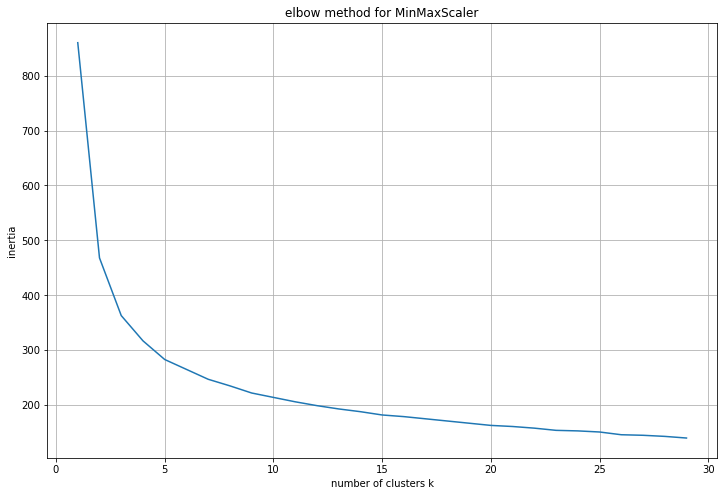

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.grid()
ax.set(xlabel='number of clusters k', ylabel='inertia',
      title='elbow method for MinMaxScaler')
sns.lineplot(x= list(range(1,30)), y=inertia_list)
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_list = []
for i in range(2,100):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(df_minmax)
    clusters = myKMeans.predict(df_minmax)
    silhouette_list.append(silhouette_score(df_audio_features, clusters))

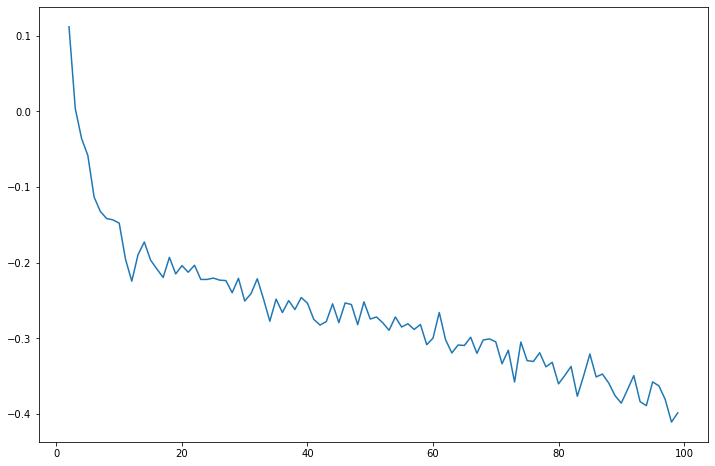

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x= list(range(2,100)), y= silhouette_list)
plt.show()

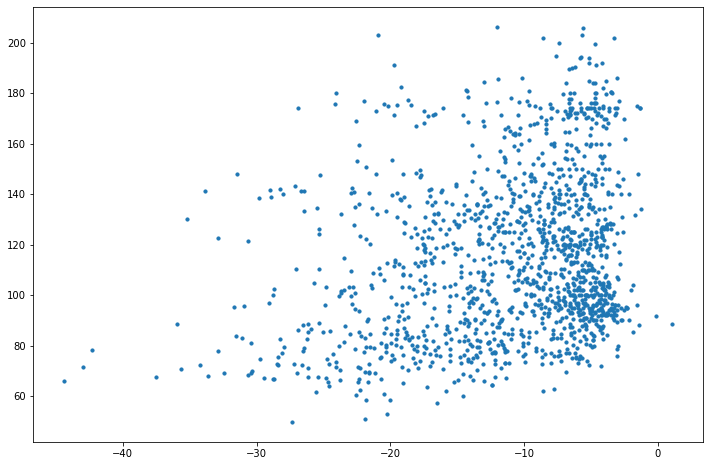

In [100]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(df_audio_features.iloc[:,2], df_audio_features.iloc[:,8], s=10, alpha = 1)
plt.show()

In [69]:
df_audio_features.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [88]:
from src.plots import colortab

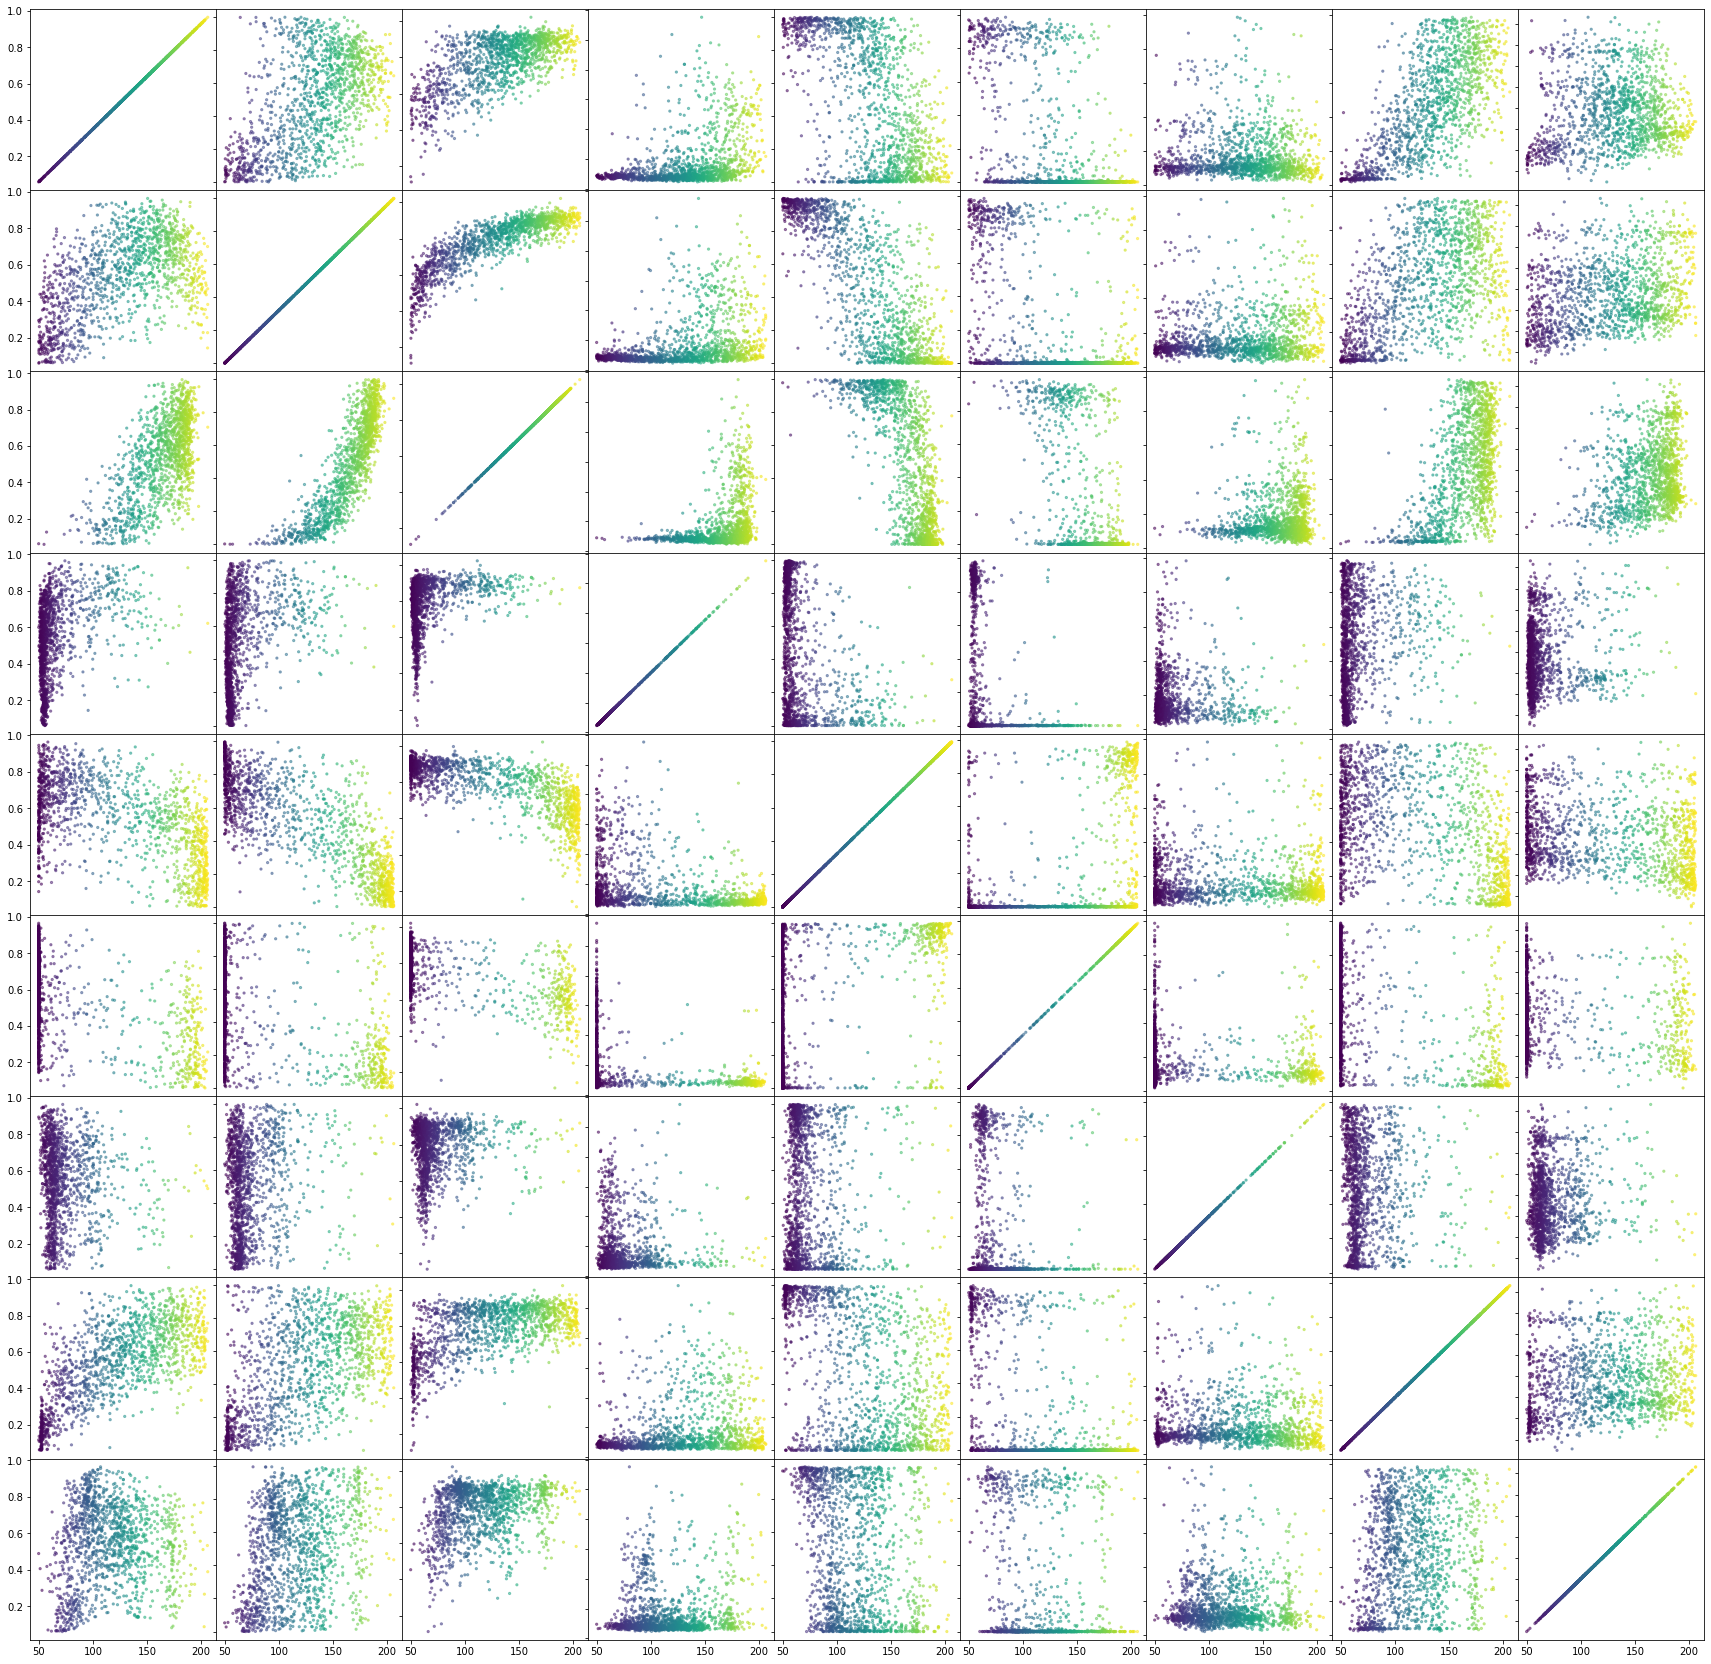

In [102]:
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(9,9, hspace=0, wspace=0)
axs = gs.subplots()
colors = [colortab(k) for k in range(9)]
for ax in axs.flat:
    ax.label_outer()
for i in range(9):
    x = df_audio_features.iloc[:,i]
    for j in range(9):
        y = df_audio_features.iloc[:,j]
        axs[i,j].scatter(x, y, s=5, c=x, alpha = .5)
plt.show()